#Installations

In [1]:
# install and import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
from sklearn import metrics
pd.set_option('display.max_columns', None)
!pip install keplergl --quiet
from keplergl import KeplerGl
!pip install kmodes --quiet
from kmodes.kmodes import KModes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.4/18.4 MB 69.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 96.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 11.7 MB/s eta 0:00:00


# Data Loading + Preprocessing

Please note that feature selection is not used, due to the fact that all questions need to be used to train the model.

In [2]:
#read data into dataframe
data = pd.read_csv("/content/mock_data_rubric.csv")
# checking the features, datatypes, and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Program Name   800 non-null    object 
 1   D1_Q1          800 non-null    object 
 2   D1_Q2          800 non-null    object 
 3   D1_Q3          800 non-null    object 
 4   D1_Q4          800 non-null    object 
 5   D2_Q1          800 non-null    object 
 6   D2_Q2          800 non-null    object 
 7   D2_Q3          800 non-null    object 
 8   D2_Q4          800 non-null    object 
 9   D3_Q1          800 non-null    object 
 10  D3_Q2          800 non-null    object 
 11  D3_Q3          800 non-null    object 
 12  D3_Q4          800 non-null    object 
 13  D4_Q1          800 non-null    object 
 14  D4_Q2          800 non-null    object 
 15  D4_Q3          800 non-null    object 
 16  D4_Q4          800 non-null    object 
 17  D5_Q1          800 non-null    object 
 18  D5_Q2     

In [3]:
'''
make sure there are no na values present.
normally we would check for duplicates, but since ideally the data is self submitted, there could be duplicate values for the rubric which makes sense realistically
'''
data.dropna(inplace=True)
# dropping the average score column, since it won't be used
data.drop('Average_Score',axis=1, inplace=True)

# Exploratory Data Analysis
The purpose of this section is to demonstrate the ways in which we can visualize different aspects of the collegiate scorecard data, which is descriptive information about institutions from the Department of Education. The intention for this is to paint a picture of what institutions that have esports programs look like. This section is just an example of visualizations that can be done, not using actual institutions that have esports programs. This because we will not have a concrete list of these institutions until real data is collected in the fall.

In [91]:
# simulate selecting features from institution data that we would want to bridge with rubric data
selected_features = ['UNITID', 'OPEID', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'LOCALE', 'LATITUDE', 'LONGITUDE']
# read school data to pandas dataframe, select above features
school_data = pd.read_csv('/content/Most-Recent-Cohorts-Institution_05192025.csv',low_memory=False)
school_data = school_data[selected_features]

In [92]:
# create a pie chart to show how many schools offer what level of degrees
degrees_granted_dictionary = {
 0.0: 'Non-degree-granting',
 1.0: 'Certificate degree',
 2.0: 'Associate degree',
 3.0: 'Bachelor\'s degree',
 4.0: 'Graduate degree',
}

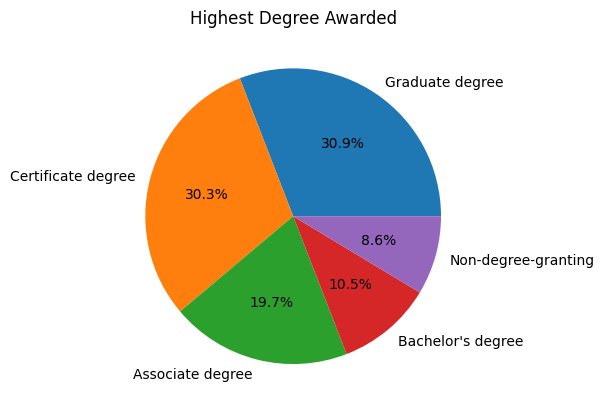

In [93]:
# map dictionary and get value counts
school_data['HIGHDEG'] = school_data['HIGHDEG'].map(degrees_granted_dictionary)
degree_counts = school_data['HIGHDEG'].value_counts()
# plot pie
plt.pie(degree_counts,autopct='%1.1f%%', labels=degree_counts.index)
plt.title('Highest Degree Awarded')
plt.show()

In [94]:
# create a bar chart to show what kind of institutions predominantly offer which type of degrees
predominant_degree_dictionary = {0: 'Not classified',
                      1: 'Predominantly certificate-degree granting',
                      2: 'Predominantly associate\'s-degree granting',
                      3: 'Predominantly bachelor\'s-degree granting',
                      4: 'Entirely graduate-degree granting'}

/tmp/ipython-input-3224807187.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=school_data['PREDDEG'], palette='Set2', ax=ax, legend=False)


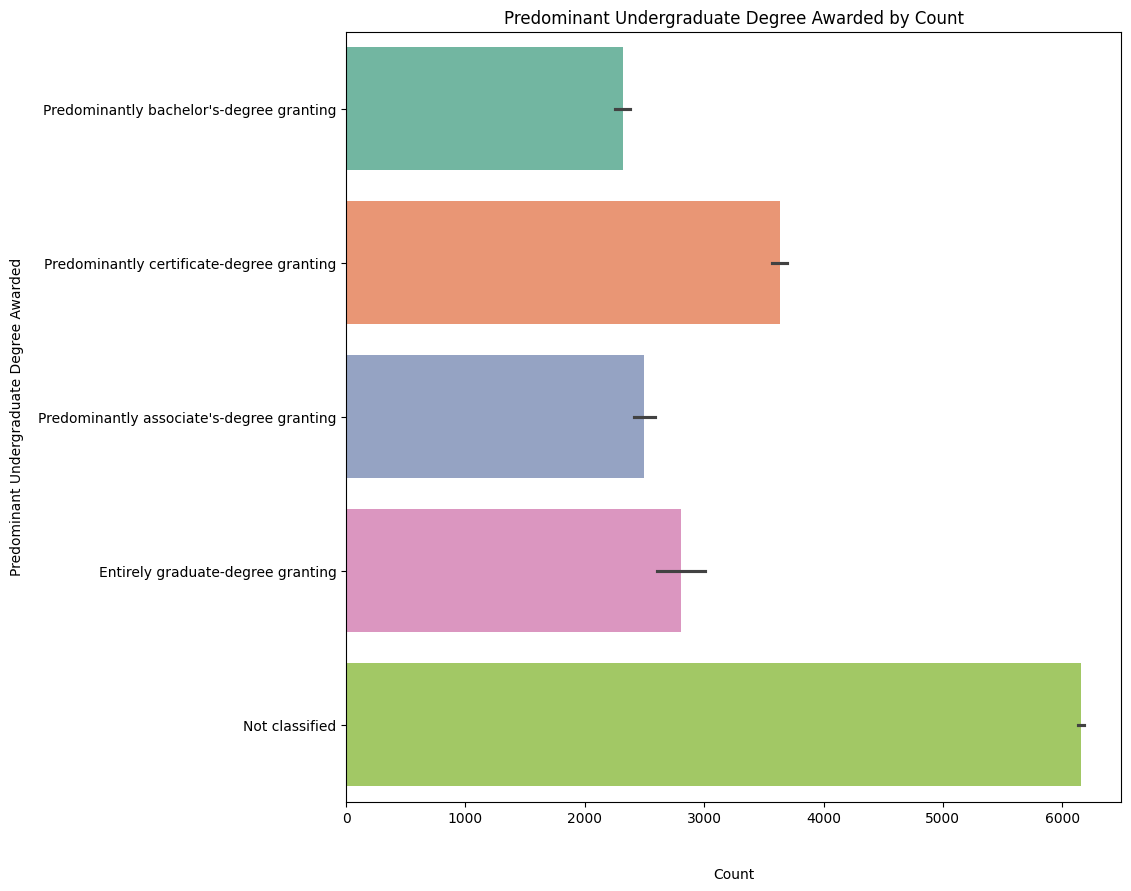

In [95]:
# map dictionary to be used in the bar chart
school_data['PREDDEG'] = school_data['PREDDEG'].map(predominant_degree_dictionary)
# create barplot for predominant degree offered
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=school_data['PREDDEG'], palette='Set2', ax=ax, legend=False)
ax.set_xlabel("Count", labelpad=30)
ax.set_ylabel("Predominant Undergraduate Degree Awarded", labelpad=10)
plt.title('Predominant Undergraduate Degree Awarded by Count')
plt.show()

/tmp/ipython-input-2815612343.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=school_data['ACCREDAGENCY'], palette='Set2', ax=ax, legend=False)


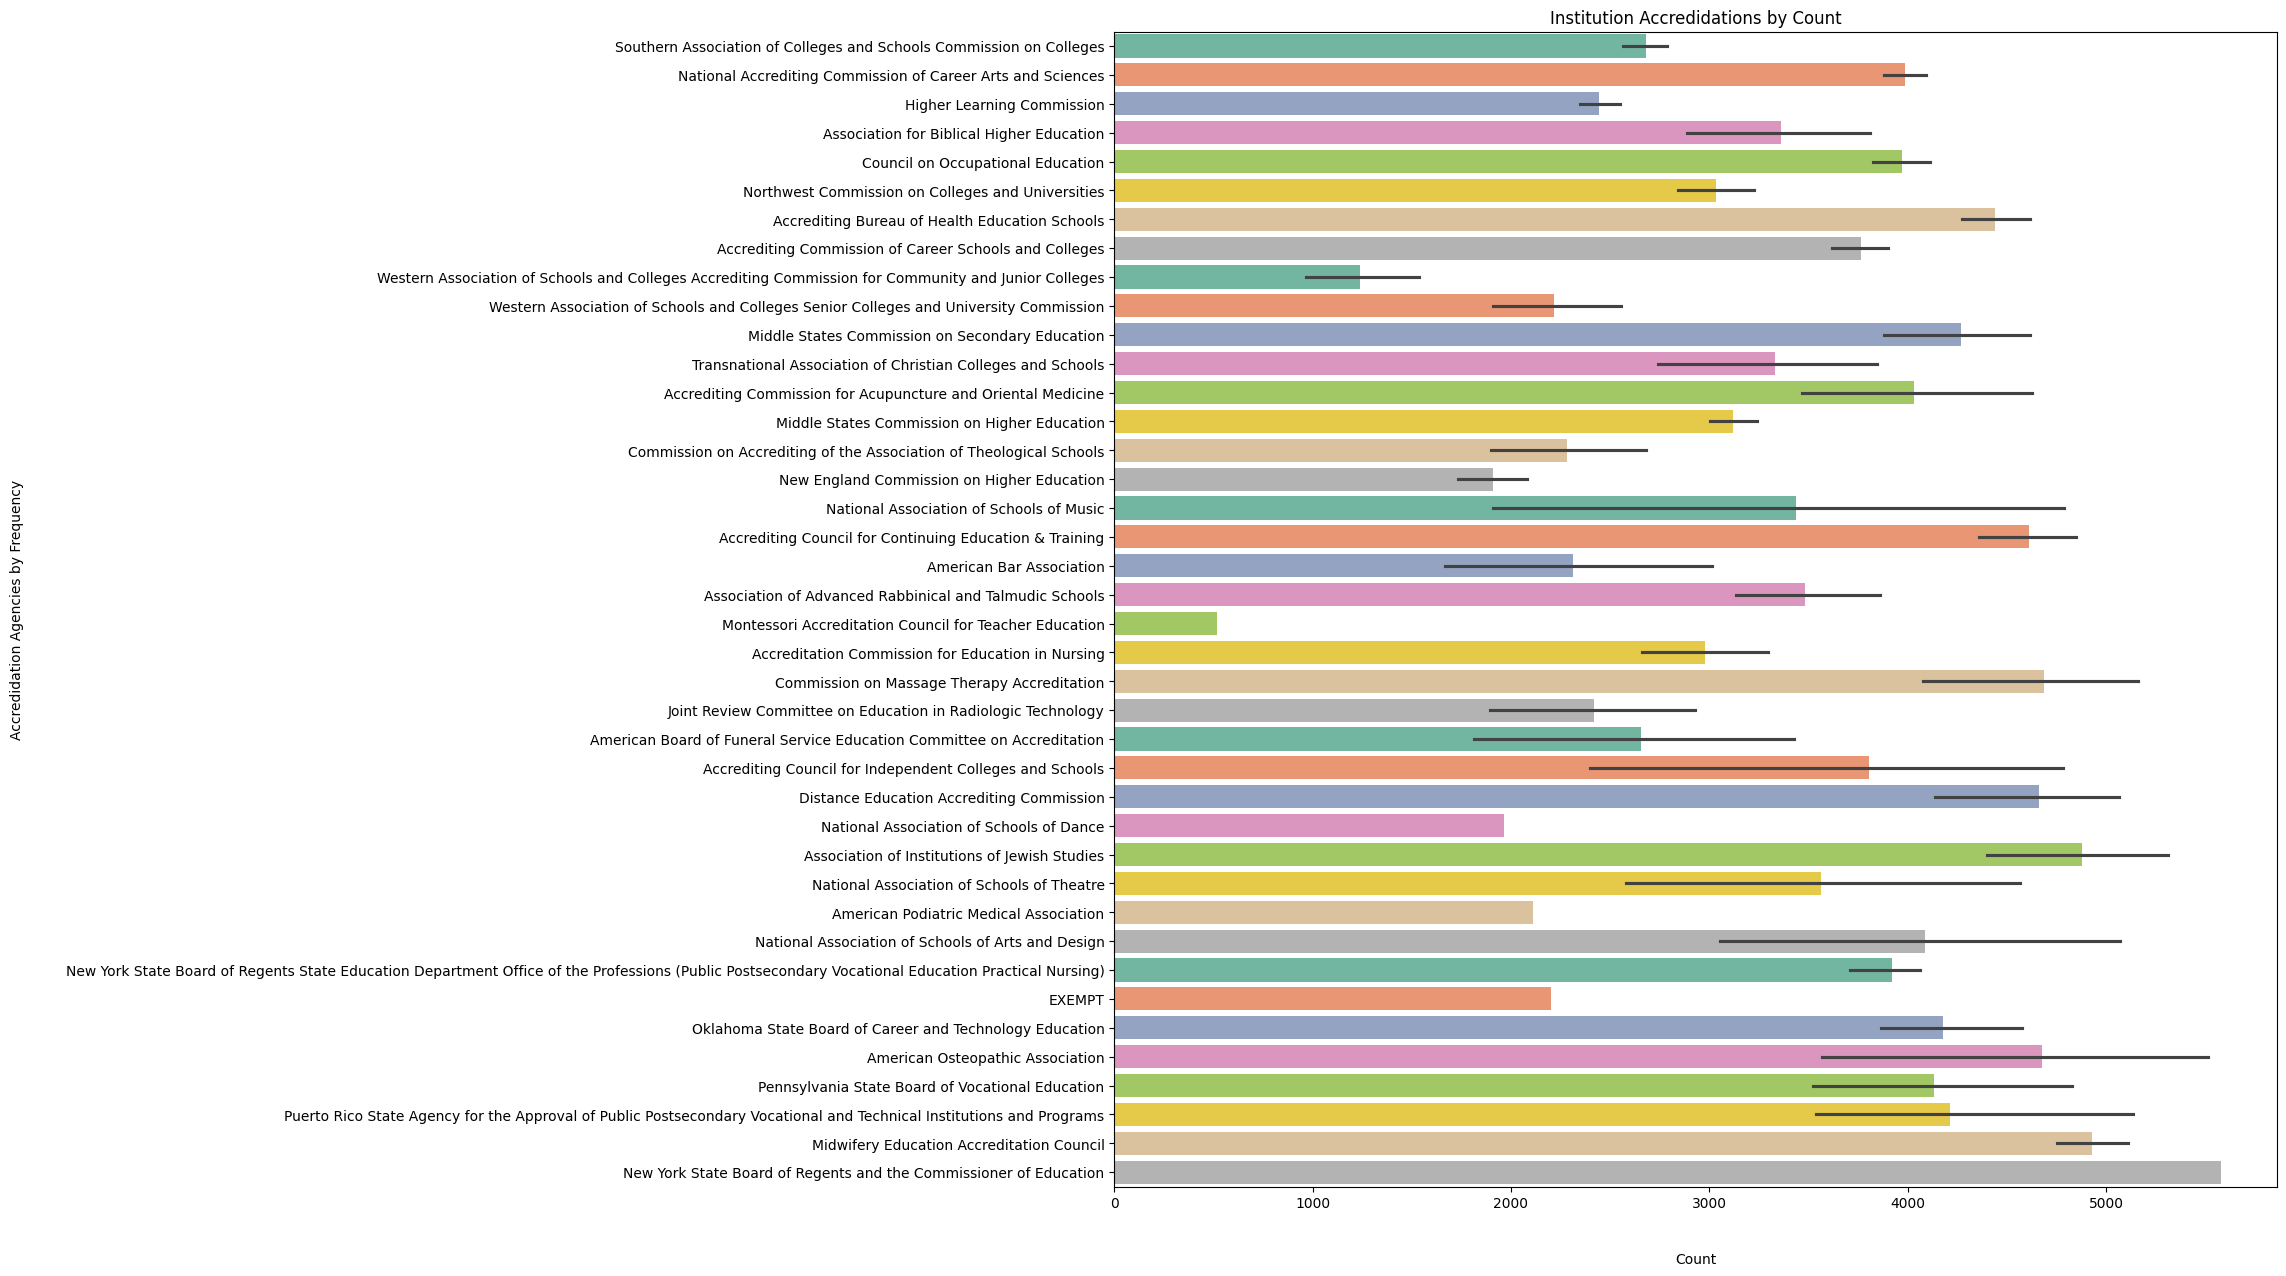

In [96]:
# create barplot for institution accredidations by count
fig, ax = plt.subplots(figsize=(15,15))
sns.barplot(data=school_data['ACCREDAGENCY'], palette='Set2', ax=ax, legend=False)
ax.set_xlabel("Count", labelpad=30)
ax.set_ylabel("Accredidation Agencies by Frequency", labelpad=30)
plt.title('Institution Accredidations by Count')
plt.show()

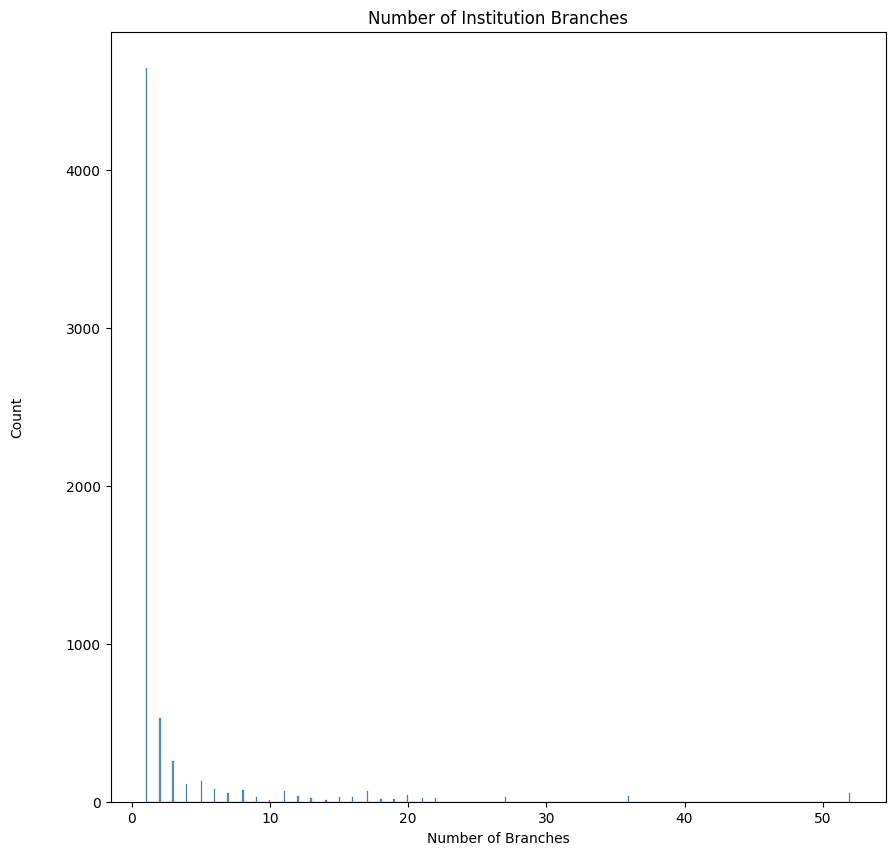

In [97]:
# create a histogram for the number of institution branches by count (# of institutions that have this # of branches)
fig2, ax2 = plt.subplots(figsize=(10,10))
sns.histplot(data=school_data['NUMBRANCH'], ax=ax2)
ax2.set_xlabel("Number of Branches")
ax2.set_ylabel("Count", labelpad=30)
plt.title("Number of Institution Branches")
plt.show()

In [98]:
# format location data to be used for the kepler gl map
school_map_data = school_data.replace([ np.inf, -np.inf],np.nan).dropna(subset=['LATITUDE','LONGITUDE'])
school_map_data = school_data.loc[:, ['LATITUDE','LONGITUDE']]
school_map_data['LATITUDE'] = school_map_data['LATITUDE'].astype(str)
school_map_data['LONGITUDE'] = school_map_data['LONGITUDE'].astype(str)

In [100]:
# allow widget to display
from google.colab import output
output.enable_custom_widget_manager()

In [101]:
#initialize kepler gl map
school_map = KeplerGl(height=500)
map_data = school_data.iloc[0:1000]
school_map.add_data(map_data, name='school_data')

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [102]:
# display kepler gl map
school_map

KeplerGl(data={'school_data': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

# Predictive Model
The purpose of this section is to create a predictive model (Random Forest) to classify esports programs into divisions. This model uses mock data due to lack of readily-available data. The intention is to collect real data in the future.

In [ ]:
#create a copy of the dataframe to use for clustering later on, so that it does not become encoded
data_cluster = data.copy()
data_cluster = data_cluster.drop(['Division','Program Name'], axis=1)
data_cluster.head()

,D1_Q1,D1_Q2,D1_Q3,D1_Q4,D2_Q1,D2_Q2,D2_Q3,D2_Q4,D3_Q1,D3_Q2,D3_Q3,D3_Q4,D4_Q1,D4_Q2,D4_Q3,D4_Q4,D5_Q1,D5_Q2,D5_Q3,D5_Q4,D6_Q1,D6_Q2,D6_Q3,D6_Q4,D7_Q1,D7_Q2,D7_Q3,D7_Q4
0,"Fully institutionalized, including multiple fu...",Clearly housed within a defined institutional ...,Model alignment exemplifying institutional bes...,"Comprehensive, robust processes ensuring full ...","Spaces are fully purpose-built, professionally...","Equipment is state-of-the-art, high-performanc...",Dedicated spaces support regular community gat...,Professional-grade production studios and comp...,"We have a robust, adaptive budget that fully s...","Comprehensive, competitive scholarships are fu...",Our program employs a fully professionalized t...,Our fundraising activities are strategically p...,Sustained national prominence and leadership a...,Structured recruitment with regular external o...,Comprehensive coaching system essential to sus...,"Highly effective, structured talent developmen...",Comprehensive eligibility standards are rigoro...,"Comprehensive and exemplary in clarity, adapti...",Structured mechanisms are in place and are reg...,"Extensive, transparent, and consistently updat...","Central, unifying force significantly shaping ...","Sustained, influential engagement significantl...",Significant contribution to campus culture and...,"Highly structured, strategic, and influential ...","Comprehensive, fully integrated support for st...",Seamlessly integrated into all aspects of the ...,Regular structured opportunities explicitly li...,Fully integrated and seamlessly coordinated wi...
1,"Fully institutionalized, including multiple fu...",Permanently integrated with clear positioning.,Consistent alignment.,"Comprehensive, robust processes ensuring full ...","Spaces are fully purpose-built, professionally...","Equipment is state-of-the-art, high-performanc...","Vibrant, versatile spaces exist and are design...",Professional-grade production studios and comp...,"We have a robust, adaptive budget that fully s...","Comprehensive, competitive scholarships are fu...",Our staff includes one or two funded full-time...,"We have well-established, diverse revenue-gene...",Sustained national prominence and leadership a...,Highly structured recruitment attracting top e...,Comprehensive coaching system essential to sus...,Structured development promoting continuous co...,Comprehensive eligibility standards are rigoro...,"Comprehensive and exemplary in clarity, adapti...",Robust oversight with consistent enforcement a...,"Extensive, transparent, and consistently updat...","Central, unifying force significantly shaping ...","Sustained, influential engagement significantl...",Widely recognized leader with major cultural i...,Regularly structured strategy actively integra...,"Comprehensive, fully integrated support for st...",Seamlessly integrated into all aspects of the ...,Regular structured opportunities explicitly li...,Fully integrated and seamlessly coordinated wi...
2,"Fully institutionalized, including multiple fu...",Permanently integrated with clear positioning.,Model alignment exemplifying institutional bes...,"Comprehensive, robust processes ensuring full ...","Spaces are fully purpose-built, professionally...","Equipment is state-of-the-art, high-performanc...","Vibrant, versatile spaces exist and are design...",Professional-grade production studios and comp...,"We have a robust, adaptive budget that fully s...","Comprehensive, competitive scholarships are fu...",Our program employs a fully professionalized t...,"We have well-established, diverse revenue-gene...",Sustained national prominence and leadership a...,Structured recruitment with regular external o...,Comprehensive coaching system essential to sus...,"Highly effective, structured talent developmen...",Comprehensive eligibility standards are rigoro...,"Comprehensive and exemplary in clarity, adapti...",Robust oversight with consistent enforcement a...,Formal documentation with clear stand

In [ ]:
# initialize label encoder dictionary
encoded_labels = {}
# encode all columns except the column name
columns_to_encode = data.iloc[:,1:]
# for each column that we want to encode, encode and store the encoded labels
for column in columns_to_encode.columns:
  le = LabelEncoder()
  data[column] = le.fit_transform(data[column])
  encoded_labels[column] = dict(zip(le.classes_, le.transform(le.classes_)))
# print encoded labels
print(encoded_labels)

{'D1_Q1': {'Emerging, typically held by an organized group of students, or a graduate assistant.': np.int64(0), 'Established, supported by paid staff positions with overlapping roles.': np.int64(1), 'Fully institutionalized, including multiple full-time staff, each with delineated roles.': np.int64(2), 'Informal, dependent on unorganized individuals.': np.int64(3)}, 'D1_Q2': {'Clearly housed within a defined institutional unit.': np.int64(0), 'Limited integration.': np.int64(1), 'Not integrated, the program has no clear space within institutional structures.': np.int64(2), 'Permanently integrated with clear positioning.': np.int64(3)}, 'D1_Q3': {'Consistent alignment.': np.int64(0), 'Decisions made independently, without alignment.': np.int64(1), 'Model alignment exemplifying institutional best practices.': np.int64(2), 'Occasional alignment.': np.int64(3)}, 'D1_Q4': {'Comprehensive, robust processes ensuring full continuity and sustainability.': np.int64(0), 'Established processes exi

In [ ]:
# check to see if the encoding worked
data.head()

,Program Name,D1_Q1,D1_Q2,D1_Q3,D1_Q4,D2_Q1,D2_Q2,D2_Q3,D2_Q4,D3_Q1,D3_Q2,D3_Q3,D3_Q4,D4_Q1,D4_Q2,D4_Q3,D4_Q4,D5_Q1,D5_Q2,D5_Q3,D5_Q4,D6_Q1,D6_Q2,D6_Q3,D6_Q4,D7_Q1,D7_Q2,D7_Q3,D7_Q4,Division
0,Generated Program,2,0,2,0,1,3,1,3,1,0,0,0,3,3,0,0,2,1,3,0,0,3,1,0,0,3,3,1,0
1,Generated Program,2,3,0,0,1,3,3,3,1,0,2,2,3,0,0,3,2,1,2,0,0,3,3,3,0,3,3,1,0
2,Generated Program,2,3,2,0,1,3,3,3,1,0,0,2,3,3,0,0,2,1,2,1,0,1,3,0,3,3,0,1,0
3,Generated Program,2,3,2,1,1,3,3,0,1,0,2,2,3,0,1,0,2,1,2,0,0,3,3,3,0,3,3,1,0
4,Generated Program,2,3,2,0,1,3,3,3,1,0,0,0,3,0,1,0,2,1,2,1,0,3,3,3,0,3,0,3,0


In [ ]:
# target variable
y = data['Division']
# independent variables
X = data.drop(['Division','Program Name'], axis=1)

In [ ]:
# split into testing training and validation sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2)
X_val,X_test,y_val,y_test = train_test_split(X_temp,y_temp,test_size=.5,random_state=42)

In [ ]:
# instatiate random forest model, train the model on the training data
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# generate predictions for test data
y_pred = rf.predict(X_test)

In [ ]:
# generate accuracy score, comparing our y predictions to what the test data actually was
accuracy = accuracy_score(y_test,y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


In [ ]:
# import necessary modules for k folds cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
#set the number of k folds, perform k fold cross validation
k = 10
kf = KFold(n_splits=k,shuffle=True,random_state=42)

In [ ]:
# evaluate the model on the validation set
y_val_predictions = rf.predict(X_val)
val = accuracy_score(y_val,y_val_predictions)
print(val)

0.9625


In [ ]:
#getting the accuracy, recall, and f1 score to evaluate the model on the test set
y_test_predictions = rf.predict(X_test)
target_names = ['Division 1', 'Division 2', 'Division 3', 'Division 4']
class_report = classification_report(y_test,y_test_predictions,output_dict=True,target_names=target_names)
print(class_report)

{'Division 1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 24.0}, 'Division 2': {'precision': 0.8888888888888888, 'recall': 0.8888888888888888, 'f1-score': 0.8888888888888888, 'support': 18.0}, 'Division 3': {'precision': 0.9090909090909091, 'recall': 0.9090909090909091, 'f1-score': 0.9090909090909091, 'support': 22.0}, 'Division 4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0}, 'accuracy': 0.95, 'macro avg': {'precision': 0.9494949494949495, 'recall': 0.9494949494949495, 'f1-score': 0.9494949494949495, 'support': 80.0}, 'weighted avg': {'precision': 0.95, 'recall': 0.95, 'f1-score': 0.95, 'support': 80.0}}


Text(0.5, 1.0, 'Random Forest Classification Report Metrics')

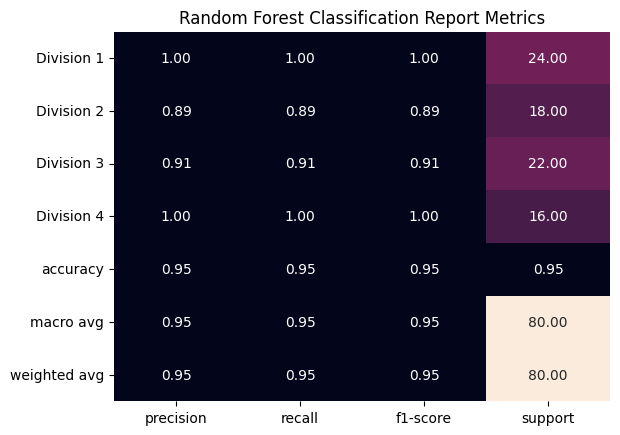

In [ ]:
# create a heatmap of the classification report
# encoded labels: 'Division 1': np.int64(0), 'Division 2': np.int64(1), 'Division 3': np.int64(2), 'Division 4': np.int64(3)}
report = pd.DataFrame(class_report).transpose()
sns.heatmap(report,annot=True,cbar=False, fmt='.2f')
plt.title('Random Forest Classification Report Metrics')

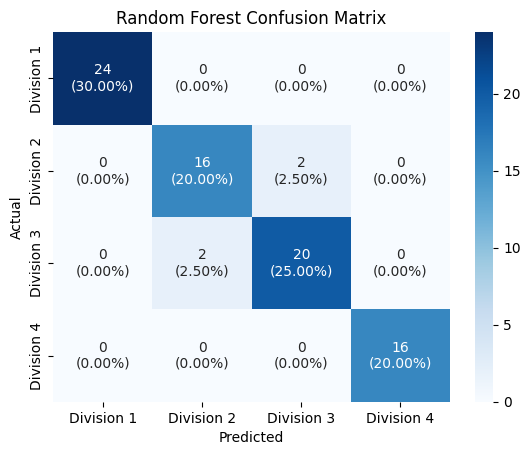

In [ ]:
#create a graph displaying the confusion matrix for the random forest model
confusion = confusion_matrix(y_test,y_test_predictions)
total = confusion.sum() # get sum of test set observations
annot = [[f"{val}\n({val/total:.2%})" for val in row] for row in confusion] # format the annotations
sns.heatmap(confusion, annot=annot, fmt="",cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Random Forest Confusion Matrix')
plt.xticks([0.5,1.5,2.5,3.5],['Division 1', 'Division 2', 'Division 3', 'Division 4'])
plt.yticks([0.5,1.5,2.5,3.5],['Division 1', 'Division 2', 'Division 3', 'Division 4'])
plt.show()

In [ ]:
# get the accuracy scores for k fold cross validation
k_fold_score = cross_val_score(rf,X_train,y_train, cv=kf,scoring='accuracy')
print("K Fold Accuracy\n" + str(k_fold_score) + "\n")
# f1 score
k_fold_score = cross_val_score(rf,X_train,y_train, cv=kf,scoring='f1_macro')
print("K Fold F1\n" + str(k_fold_score) + "\n")
# roc auc
k_fold_score = cross_val_score(rf,X_train,y_train, cv=kf,scoring='roc_auc_ovr')
print("K Fold ROC OVR\n" + str(k_fold_score) + "\n")

K Fold Accuracy
[0.9375   0.875    0.890625 0.875    0.9375   0.9375   0.90625  0.953125
 0.953125 0.984375]

K Fold F1
[0.95079365 0.89051808 0.89828042 0.84976153 0.96861472 0.94427245
 0.91071429 0.95454545 0.95141066 0.98003072]

K Fold ROC OVR
[0.9958433  0.98602139 0.99122936 0.97009223 0.99234537 0.98792271
 1.         0.98648742 0.99218398 0.99953704]



# K-Modes Clustering
The purpose of this section is to perform K-Modes clustering on the mock data, to see if the cluster centroids would approximately fall within each division (1-4).

In [ ]:
# import kmodes library
from kmodes.kmodes import KModes

In [ ]:
# should be sorted in to 4 clusters, to test if the clusters sort into each division properly
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

In [ ]:
# predict and output the clusters
clusters = km.fit_predict(data_cluster)
data_cluster['Cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 290, cost: 9785.0
Run 1, iteration: 2/100, moves: 51, cost: 9747.0
Run 1, iteration: 3/100, moves: 33, cost: 9683.0
Run 1, iteration: 4/100, moves: 22, cost: 9672.0
Run 1, iteration: 5/100, moves: 13, cost: 9664.0
Run 1, iteration: 6/100, moves: 10, cost: 9662.0
Run 1, iteration: 7/100, moves: 2, cost: 9662.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 299, cost: 9880.0
Run 2, iteration: 2/100, moves: 0, cost: 9880.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 305, cost: 9860.0
Run 3, iteration: 2/100, moves: 0, cost: 9860.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 200, cost: 9752.0
Run 4, iteration: 2/100, moves: 28, cost: 9740.0
Run 4, iteration: 3/100, moves: 14, cost: 

In [ ]:
# output the cluster centroids, ideally this should be somewhat of a perfect representation of each division as the centroid
print(km.cluster_centroids_)

[['Informal, dependent on unorganized individuals.'
  'Not integrated, the program has no clear space within institutional structures.'
  'Decisions made independently, without alignment.'
  'There are no processes in place currently.'
  'Spaces are shared and repurposed from rooms originally intended for non-esports purposes.'
  'Equipment is outdated, unreliable, and often insufficient for consistent competitive play.'
  'Little to no designated spaces exist for community engagement or recreational gaming activities.'
  'No production or broadcast capabilities are available or utilized.'
  'We have no consistent budget and rely entirely on ad hoc funding or player contributions.'
  'Scholarships are unavailable.'
  'Our staff consists entirely of volunteers or unpaid individuals; there are no paid positions.'
  'Our revenue generation is minimal or nonexistent, relying entirely on inconsistent and ad hoc fundraising efforts.'
  'Minimal or no competitive success.'
  'Informal and int